In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
import matplotlib.pyplot as plt
from scipy.stats import sem
def plot_single_erp(dat,ax=None,t_ar=None,alpha=0.3,color='b',label=None):
    if(ax is None):
        fig,ax = plt.subplots()
    if(label is None):
        label = '_hide'
    
    sig = dat.mean(0)
    err = sem(dat,axis=0)
    if(t_ar is None): 
        t_ar = range(sig.shape[0])
    ax.plot(t_ar,sig,color=color,label=label)
    ax.fill_between(t_ar,sig+err,sig-err,color=color,alpha=alpha)
    return(ax,sig,err)


def return_spk_raster(spks,times,t_ar=[-1,1]):

    cur_times = spks.copy()#quality.sua[quality.cluster_id == neuron_id].values[0]#spk_dictionary['sua'][neuron_id][0]
    cnt = -1
    all_elg_trial = []
    for i,tr in enumerate(times):
        elg_times = cur_times[ (cur_times >= (tr + t_ar[0]) ) & (cur_times <= (tr + t_ar[1]) ) ]
        elg_times -= tr
        all_elg_trial.append(elg_times)

    return(all_elg_trial)

probe_mapper = {'NP34_B2_0': 'P1-S1-P1',
                'NP34_B3_0': 'P1-S2-P1',
                'NP35_B2_0': 'P2-S1-P1',
                'NP66_B1_0': 'P3-S1-P1',
                'NP66_B1_1': 'P3-S1-P2',
                'NP66_B2_0': 'P3-S2-P1',
                'NP66_B2_1': 'P3-S2-P2',
                'NP86_B1_0': 'P4-S1-P1',
                'NP86_B1_1': 'P4-S1-P2',}

blk_mapper = {'NP34_B2': 'P1-S1',
                'NP34_B3': 'P1-S2',
                'NP35_B2': 'P2-S1',
                'NP86_B1': 'P4-S1',
                'NP66_B1': 'P3-S1',
                'NP66_B2': 'P3-S2',}

source_path = './source_data/FIG6/'

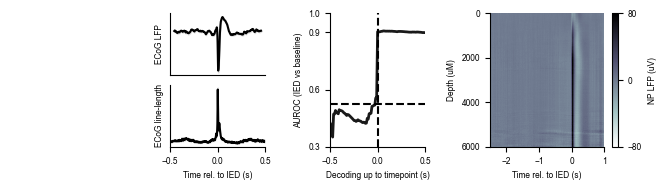

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# ============================================================
# CREATE COMPOSITE LAYOUT
# ============================================================

fig = plt.figure(figsize=(7, 1.7))
gs = gridspec.GridSpec(
    2, 4,
    width_ratios=[1, 1, 1, 1.5],
    wspace=0.6,
    hspace=0.15
)
fig.subplots_adjust(left=0.06, right=0.95, top=0.975, bottom=0.19)


# ============================================================
# COLUMN 0 — BLANK
# ============================================================

ax_blank_top = fig.add_subplot(gs[0, 0])
ax_blank_bot = fig.add_subplot(gs[1, 0])
ax_blank_top.axis('off')
ax_blank_bot.axis('off')

# ============================================================
# COLUMN 1 — ECoG ERP (2 x 1 panel, unchanged)
# ============================================================

d = np.load(f'{source_path}/ecog_decoding.npz')
ied_erp = d['ied_erp']
ll = d['ll']

ax1 = fig.add_subplot(gs[0, 1])
plot_single_erp(
    ied_erp,
    ax=ax1,
    t_ar=np.linspace(-0.5, 0.5, ied_erp.shape[1]),
    color='k',
    alpha=0.1
)
ax1.set(ylabel='ECoG LFP', xticks=[], yticks=[])

ax2 = fig.add_subplot(gs[1, 1])
plot_single_erp(
    ll,
    ax=ax2,
    t_ar=np.linspace(-0.5, 0.5, ied_erp.shape[1]),
    color='k',
    alpha=0.1
)
ax2.set(
    ylabel='ECoG line-length',
    xlabel='Time rel. to IED (s)',
    yticks=[],xlim=[-0.5,0.5]
)

# ============================================================
# COLUMN 2 — AUROC DECODING TRACE
# ============================================================

d = np.load(f'{source_path}/ecog_decoding_trace.npz')
rocs_null = d['rocs_null']
rocs = d['rocs']

ax3 = fig.add_subplot(gs[:, 2])

t_ar = np.linspace(-0.5, 0.5, len(rocs))
ax3.plot(t_ar, rocs, color='k', alpha=0.9, linewidth=2)
ax3.axvline(0, color='k', linestyle='--')
ax3.axhline(
    np.percentile(rocs_null, 99.5),
    color='k',
    linestyle='--'
)

ax3.set(
    ylabel='AUROC (IED vs baseline)',
    xlabel='Decoding up to timepoint (s)',xlim=[-0.5,0.5],ylim=[0.3,1],yticks=[0.3,0.6,0.9,1]
)

# ============================================================
# COLUMN 3 — DEPTH × TIME LFP HEATMAP
# ============================================================

d = np.load(f'{source_path}/ex_lfp.npz')
lfp = d['lfp']
depth = d['depth']

ax4 = fig.add_subplot(gs[:, 3])

t_ar = np.linspace(-2.5, 1, lfp.shape[1])
im = ax4.pcolormesh(
    t_ar,
    depth,
    lfp,
    cmap='bone_r',
    vmin=-80,
    vmax=80,
    rasterized=True
)


ax4.set(
    xlabel='Time rel. to IED (s)',
    ylabel='Depth (uM)',ylim=[0,6000],yticks=[0,2000,4000,6000],xlim=[-2.5,1],
)
ax4.invert_yaxis()

plt.colorbar(im, ax=ax4, label='NP LFP (uV)',ticks=[-80,0,80])

# ============================================================
# FINALIZE
# ============================================================

# plt.savefig('./current_composite/ecog_combined.pdf',
#             transparent=True, dpi=800)
plt.show()


(0.0, 1.0, 0.0, 1.0)

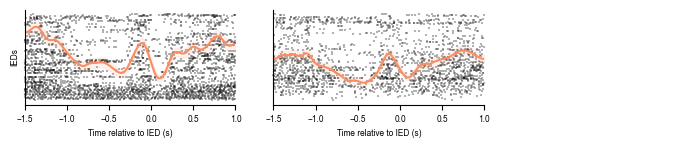

In [3]:
import seaborn as sns
d = np.load(f'{source_path}/ex_rasters_decoding.npz')
psth_ied = d['psth_ied']
spks1 = d['spks1']
spks2 = d['spks2']
ied_times = d['ied_times']

fig, axes = plt.subplots(1, 3, figsize=(7, 1.3),width_ratios=[1,1,0.7])  # 1 x 3 layout
fig.subplots_adjust(left=0.06, right=0.982, top=0.99, bottom=0.26)

for i, spks in enumerate([spks1, spks2]):
    ax = axes[i]

    spk_raster = return_spk_raster(spks, ied_times, [-1.5, 1])
    r = [r for r in spk_raster if len(r) > 0]

    for ind, tr in enumerate(r):
        ax.scatter(
            tr,
            np.repeat(ind, len(tr)),
            color='k',
            alpha=0.3,
            clip_on=False,
            marker='|',
            s=3
        )

    ax.set_xlim([-1.5, 1])

    plot_single_erp(
        12 * psth_ied[:, :, i],
        ax=ax,
        t_ar=np.linspace(-1.5, 1, psth_ied.shape[1]),
        color=sns.color_palette('Set2')[1],
        alpha=0.1
    )

    ax.set(yticks=[], ylabel='IEDs', xlabel='Time relative to IED (s)')
    if(i == 1): ax.set(ylabel='')
# third subplot intentionally blank
axes[2].axis('off')
#plt.savefig('./current_composite/raster_row.pdf',transparent=True,dpi=800)

[Text(0.5, 0, 'Time (up to 0.25s)'), Text(0, 0.5, 'Neurons'), []]

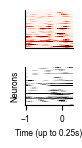

In [4]:
d = np.load(f'{source_path}/dec_schematic.npz')
psth_ied = d['psth_ied']
psth_baseline = d['psth_baseline']


fig, axs = plt.subplots(2,1,figsize=(0.8,1.3),gridspec_kw=dict(hspace=0.5))
fig.subplots_adjust(left=0.2, right=0.8, top=0.99, bottom=0.26)

t_ar = np.linspace(-1,0.25,25)
axs[0].pcolormesh(t_ar,range(psth_ied.shape[-1]),psth_ied.T,cmap='Reds',vmin=0,vmax=30)
axs[0].set(xticks=[],yticks=[],xlabel='',ylabel='')
axs[1].pcolormesh(t_ar,range(psth_ied.shape[-1]),psth_baseline.T,cmap='binary',vmin=0,vmax=30,rasterized=True)
axs[1].set(xlabel='Time (up to 0.25s)',ylabel='Neurons',yticks=[])
#plt.savefig('./current_composite/decode_schem.pdf',dpi=800,transparent=True)

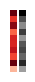

In [5]:
d = np.load(f'{source_path}/dec_schematic_pca.npz')

fig,axs = plt.subplots(1,2,gridspec_kw=dict(wspace=0.5),figsize=(0.2,1.5))

axs[0].imshow(d['x1'].reshape((-1,1)),cmap='Reds',vmin=-10,vmax=10)
axs[0].set(yticks=[],xticks=[])
sns.despine(ax=axs[0],left=True,bottom=True)

axs[1].imshow(d['x2'].reshape((-1,1)),cmap='binary',vmin=-10,vmax=10)
axs[1].set(yticks=[],xticks=[])
sns.despine(ax=axs[1],left=True,bottom=True)
#plt.savefig('./current_composite/decode_pca.pdf',dpi=800,bbox_inches='tight',transparent=True)

/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_5200/1698392781.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_5200/1698392781.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_5200/1698392781.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_5200/1698392781.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set

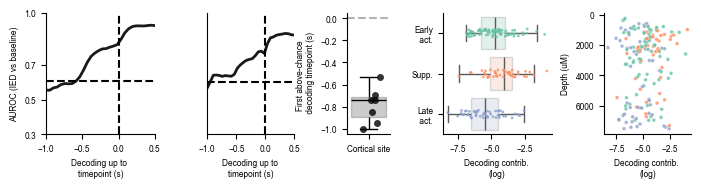

In [6]:
d = np.load(f'{source_path}/ied_prediction.npz')
rocs_null_ = d['rocs_null']
keys = d['keys']
rocs_ = d['rocs']
best_ts = d['best_ts']

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    1, 5,
    figsize=(7, 1.7),
    gridspec_kw=dict(wspace=0.6),width_ratios=[1,0.8,0.4,1,0.8]
)
fig.subplots_adjust(left=0.06, right=0.982, top=0.975, bottom=0.26)

# ---------- Panel 1: ROC (index 3) ----------
t_ar = np.linspace(-1, 0.5, len(rocs_[0]))
rocs = rocs_[3]
rocs_null = rocs_null_[3]
ax = axes[0]

ax.plot(t_ar, rocs, color='k', alpha=0.9, linewidth=2)
ax.axvline(0, color='k', linestyle='--')
ax.axhline(np.percentile(np.array(rocs_null), 99, axis=0),
           color='k', linestyle='--')

ax.set(
    ylabel='AUROC (IED vs baseline)',
    xlabel='Decoding up to \ntimepoint (s)',
    ylim=[0.3, 1],yticks=[0.3,0.5,0.7,1],xlim=[-1,0.5]
)

# ---------- Panel 2: ROC (index 4) ----------
t_ar = np.linspace(-1, 0.5, len(rocs_[0]))
rocs = rocs_[4]
rocs_null = rocs_null_[4]
ax = axes[1]

ax.plot(t_ar, rocs, color='k', alpha=0.9, linewidth=2)
ax.axvline(0, color='k', linestyle='--')
ax.axhline(np.percentile(np.array(rocs_null), 99, axis=0),
           color='k', linestyle='--')

ax.set(
    #ylabel='AUROC (IED vs baseline)',
    xlabel='Decoding up to \ntimepoint (s)',
    ylim=[0.3, 1],yticks=[],xlim=[-1,0.5]
)

# ---------- Panel 3: First above-chance time ----------
ax = axes[2]

sns.stripplot(best_ts, color='k', alpha=0.8, jitter=0.4, ax=ax)
sns.boxplot(best_ts, color='k',
            boxprops=dict(alpha=0.2),
            fliersize=0,
            ax=ax)

ax.axhline(0, linestyle='--', color='k', alpha=0.3)
ax.set(
    ylabel='First above-chance \n decoding timepoint (s)',
    xticklabels=['Cortical site']
)

# ---------- Panel 4: Contribution by response type ----------
contrib_df = pd.read_csv(f'{source_path}/contrib_dec_df.csv')
ax = axes[3]

sns.boxplot(
    orient='h',
    data=contrib_df,
    y='k_mean_cluster',
    x='pre_onset_contrib',
    palette='Set2',
    boxprops=dict(alpha=0.2),
    showfliers=False,
    ax=ax
)
sns.stripplot(
    orient='h',
    data=contrib_df,
    y='k_mean_cluster',
    x='pre_onset_contrib',
    s=2,
    palette='Set2',
    alpha=0.8,
    ax=ax
)

ax.set(
    xlabel='Decoding contrib. \n(log)',
    ylabel='',
    yticklabels=['Early\n act.', 'Supp.', 'Late\n act.']
)

# ---------- Panel 5: Contribution vs depth ----------
ax = axes[4]

sns.scatterplot(
    ax=ax,
    data=contrib_df,
    x='pre_onset_contrib',
    y='depth',
    s=7,
    palette='Set2',
    hue='k_mean_cluster',
    alpha=0.8,
    legend=None
)

ax.invert_yaxis()
ax.set(
    xlabel='Decoding contrib. \n(log)',
    ylabel='Depth (uM)'
)

#plt.tight_layout()
# plt.savefig('../figure_3/current_composite/predict_ied_row.pdf',
#              transparent=True, dpi=800)
contrib_df.to_csv('./statistical_source/FIG6/panelgh.csv')



In [9]:
print(best_ts.min())
print(best_ts.max())
print(best_ts.mean())

-1.0
-0.5344827586206897
-0.7857142857142857


In [23]:
from scipy.stats import mannwhitneyu,ttest_ind,ranksums
for p in [[1,2],[1,3],[2,3]]:
    print(p)
    print(ranksums(contrib_df[(contrib_df.k_mean_cluster == p[0]) 
                       & (contrib_df.pre_onset_contrib != -1*np.inf)].pre_onset_contrib,
    contrib_df[(contrib_df.k_mean_cluster == p[1])
                       & (contrib_df.pre_onset_contrib != -1*np.inf)].pre_onset_contrib))
    
for p in range(1,4):    
    print(np.sum(contrib_df.k_mean_cluster ==p))

[1, 2]
RanksumsResult(statistic=-2.520388327242303, pvalue=0.011722542855173207)
[1, 3]
RanksumsResult(statistic=2.7943662551580517, pvalue=0.0052001546075954065)
[2, 3]
RanksumsResult(statistic=4.398182394191924, pvalue=1.0916122464778451e-05)
78
46
54


/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_90250/4084737863.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(


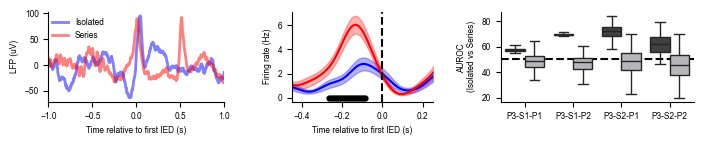

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import sem
from mne.stats import permutation_cluster_test

# ============================================================
# CREATE 1 x 3 COMPOSITE FIGURE
# ============================================================

fig, axes = plt.subplots(
    1, 3,
    figsize=(7, 1.25),
    gridspec_kw=dict(wspace=0.4),width_ratios=[1,0.8,1.1]
)
fig.subplots_adjust(left=0.06, right=0.982, top=0.98, bottom=0.26)

# ============================================================
# PANEL 1 — Isolated vs Series LFP
# ============================================================

D = np.load(
    f"{source_path}/string_vs_iso_minimal_source.npz",
    allow_pickle=True
)

iso_trace = D["iso_trace"]
series_trace = D["series_trace"]

ax = axes[0]

t_ar = np.linspace(-1, 1, iso_trace.shape[0])

ax.plot(
    t_ar,
    iso_trace,
    color='b',
    alpha=0.5,
    linewidth=2,
    label='Isolated'
)

ax.plot(
    t_ar,
    series_trace,
    color='r',
    alpha=0.5,
    linewidth=2,
    label='Series'
)

ax.set(
    ylabel='LFP (uV)',
    xlabel='Time relative to first IED (s)',xlim=[-1,1]
)

ax.set_xticks([-1, -0.5, 0, 0.5, 1])

ax.legend(
    loc=(0, 0.65),
    frameon=False
)

# ============================================================
# PANEL 2 — ERP + Cluster Significance
# ============================================================

D = np.load(
    f"{source_path}/erp_cluster_minimal_source.npz",
    allow_pickle=True
)

psth_id_0 = D["psth_id_0"]
psth_id_1 = D["psth_id_1"]
psth_interest_0 = D["psth_interest_0"]
psth_interest_1 = D["psth_interest_1"]
t_ar = D["t_ar"]
target_column = str(D["target_column"])
i = int(D["index"])

ax = axes[1]

ax, _, _ = plot_single_erp(
    psth_id_0,
    ax,
    t_ar
)

ax, _, _ = plot_single_erp(
    psth_id_1,
    ax,
    t_ar,
    color='r'
)

ax.set(
    xlim=[-0.45, 0.25],
    xlabel='Time relative to first IED (s)',
    ylabel='Firing rate (Hz)'
)

ax.axvline(0, linestyle='--', color='k')

# ----- permutation cluster test -----
for_test = []

for p in [psth_interest_0, psth_interest_1]:
    p = p[np.sum(p, axis=1) > 0, :]
    for_test.append(p)

T_obs, clusters, p_values, H0 = permutation_cluster_test(
    for_test,
    verbose='ERROR'
)

signif_mask = np.zeros(T_obs.shape)

for cluster_mask, p_val in zip(clusters, p_values):
    cluster_mask = cluster_mask[0].astype(int)
    if p_val < 0.05:
        signif_mask[cluster_mask[0]:cluster_mask[-1]] = 1

ax.scatter(
    t_ar[signif_mask > 0],
    signif_mask[signif_mask > 0] - 1,
    color='k',
    s=12
)

# ============================================================
# PANEL 3 — Decoding AUROC Boxplot
# ============================================================

plt_df = pd.read_csv(f'{source_path}/chain_decoding.csv')

ax = axes[2]

sns.boxplot(
    ax=ax,
    data=plt_df,
    x='column',
    y='Acc',
    hue='type',
    palette=['#404040', '#b6b7ba'],
    showfliers=False
)

ax.set(
    xlabel='',
    ylabel='AUROC \n(Isolated vs Series)',
    xticklabels=[probe_mapper[p.get_text()] for p in ax.get_xticklabels()]
)

ax.legend().set_visible(False)
ax.axhline(50, color='k', linestyle='--', zorder=-100)
plt_df.to_csv('./statistical_source/FIG6/panelk.csv')


# ============================================================
# FINALIZE
# ============================================================

# plt.savefig(
#     './current_composite/string_iso_row.pdf',
#     dpi=800,
#     transparent=True,
# )


In [26]:
from scipy.stats import mannwhitneyu,ranksums
import numpy as np
for c in plt_df.column.unique():
    tmp_df = plt_df[plt_df.column == c]
    print(np.percentile(tmp_df[tmp_df.type == 'Shuffle'].Acc.values,95))
    print(np.mean(tmp_df[tmp_df.type == 'True'].Acc.values))
    print(c,ranksums(tmp_df[tmp_df.type == 'True'].Acc.values,
             tmp_df[tmp_df.type == 'Shuffle'].Acc.values))
    print(len(tmp_df[tmp_df.type == 'Shuffle'].Acc.values))

58.6033950617284
57.53086419753086
NP66_B1_0 RanksumsResult(statistic=10.039884937201164, pvalue=1.0179282602402608e-23)
100
56.387924382716044
69.50578703703704
NP66_B1_1 RanksumsResult(statistic=12.216944435630522, pvalue=2.5239394239903128e-34)
100
63.57142857142857
71.69642857142858
NP66_B2_0 RanksumsResult(statistic=11.810120185924026, pvalue=3.460662523873655e-32)
100
64.79591836734694
61.985969387755105
NP66_B2_1 RanksumsResult(statistic=9.536546826453186, pvalue=1.4766749814103546e-21)
100


In [27]:
tmp_df

,Unnamed: 0,Acc,type,column
600,600,63.520408,True,NP66_B2_1
601,601,63.137755,True,NP66_B2_1
602,602,68.877551,True,NP66_B2_1
603,603,52.551020,True,NP66_B2_1
604,604,56.887755,True,NP66_B2_1
...,...,...,...,...
795,795,36.734694,Shuffle,NP66_B2_1
796,796,51.020408,Shuffle,NP66_B2_1
797,797,49.744898,Shuffle,NP66_B2_1
798,798,50.000000,Shuffle,NP66_B2_1


/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_90250/1625287288.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_90250/1625287288.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


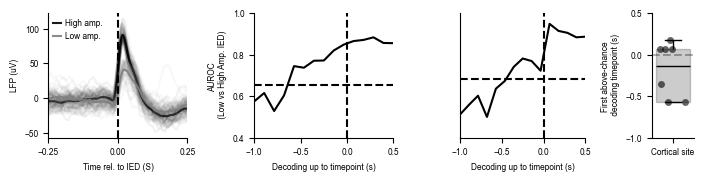

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# CREATE COMPOSITE FIGURE
# ============================================================

fig, axes = plt.subplots(
    1, 4,
    figsize=(7, 1.6),
    gridspec_kw=dict(wspace=0.6),width_ratios=[1,1,0.9,0.3]
)
fig.subplots_adjust(left=0.06, right=0.982, top=0.98, bottom=0.2)


# ============================================================
# PANEL 1 — IED AMPLITUDE–SPLIT ERP
# ============================================================

D = np.load(
    f"{source_path}/ieds_amp_minimal_source.npz",
    allow_pickle=True
)

amp = D["amp"]
erp = D["erp"]
t_ar = D["t_ar"]
key = str(D["key"])

ax = axes[0]

top = amp > np.percentile(amp, 75)
bottom = amp < np.percentile(amp, 25)

# High amplitude
ax.plot(t_ar, erp[top].T, color='k', alpha=0.05)
ax.plot(
    t_ar,
    erp[top].T.mean(1),
    color='k',
    alpha=0.9,
    label='High amp.'
)

# Low amplitude
ax.plot(t_ar, erp[bottom].T, color='grey', alpha=0.05)
ax.plot(
    t_ar,
    erp[bottom].T.mean(1),
    color='grey',
    alpha=0.9,
    label='Low amp.'
)

ax.axvline(0, color='k', linestyle='--')

ax.set(
    xlabel='Time rel. to IED (S)',
    ylabel='LFP (uV)',
    xlim=[-0.25, 0.25],xticks=[-0.25,0,0.25]
)

ax.legend(
    frameon=False,
    loc=(0.01, 0.75),
    handletextpad=0.5,
    handlelength=0.9
)

# ============================================================
# PANELS 2 & 3 — AMP DECODING AUROC TRACES
# ============================================================

D = np.load(
   f"{source_path}/amp_decoding_minimal_source.npz",
    allow_pickle=True
)

t_ar = D["t_ar"]
rocs = D["rocs"]
rocs_null = D["rocs_null"]

best_ts = []

for i, r, r_null in zip(range(len(rocs)), rocs, rocs_null):
    thresh = np.percentile(np.array(r_null), 99)

    try:
        best_ts.append(np.min(t_ar[r > thresh]))
    except:
        best_ts.append(-5)

    if i < 2:
        ax = axes[i + 1]

        ax.plot(t_ar, r, color='k')
        ax.axhline(thresh, color='k', linestyle='--')
        ax.axvline(0, color='k', linestyle='--')

        ax.set(
            ylabel='AUROC \n (Low vs High Amp. IED)',
            xlabel='Decoding up to timepoint (s)',ylim=[0.4,1],yticks=[0.4,0.6,0.8,1],xlim=[-1,0.5]
        )
        if(i == 1):
            ax.set(yticks=[],ylabel='')

# ============================================================
# PANEL 4 — FIRST ABOVE-CHANCE TIMEPOINT
# ============================================================

ax = axes[3]

sns.stripplot(best_ts, color='k', alpha=0.6, jitter=0.4, ax=ax)
sns.boxplot(best_ts, color='k', boxprops=dict(alpha=0.2), ax=ax)

ax.axhline(0, linestyle='--', color='k', alpha=0.3)

ax.set(
    ylabel='First above-chance \n decoding timepoint (s)',
    xticklabels=['Cortical site'],
    ylim=[-1, 0.5],
    yticks=[-1, -0.5, 0, 0.5]
)

# ============================================================
# FINALIZE
# ============================================================

plt.tight_layout()
# plt.savefig(
#     '../figure_3/current_composite/amp_decoding_row.pdf',
#     dpi=800,
#     transparent=True
# )
plt.show()
